In [6]:
library(fpp)

In [7]:
# read in the csv file
ds <- read.csv("GotCar.csv", sep=",", header=TRUE)

# use zoo to convert the date "YYYY-MM" to a date
zoo <- read.zoo(ds, sep=",", FUN=as.yearmon)

# us ts to convert the zoo object to ts object using the correct intervals
ts = ts(zoo, frequency=12, start=c(1990,1), end=c(2004, 4))

mn = list(month.abb, unique(floor(time(ts))))
df = as.data.frame(t(matrix(scale(ts), 12, dimnames = mn)))
scale = ts(c(t(df)), start=1990, end=c(2004, 4), freq=12)

Warning message in matrix(scale(ts), 12, dimnames = mn):
“data length [172] is not a sub-multiple or multiple of the number of rows [12]”

In [8]:
aa_fit = auto.arima(scale, approximation=FALSE, trace=FALSE)
summary(aa_fit)

Series: scale 
ARIMA(1,0,1)(0,1,1)[12] with drift         

Coefficients:
         ar1      ma1     sma1   drift
      0.9199  -0.7329  -0.6209  0.0159
s.e.  0.0549   0.0846   0.0730  0.0010

sigma^2 estimated as 0.01153:  log likelihood=129.11
AIC=-248.22   AICc=-247.83   BIC=-232.85

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set 0.0002976373 0.1022815 0.0730308 -1.737782 22.33473 0.3576848
                    ACF1
Training set -0.07405595


In [15]:
future = forecast(aa_fit, 80)

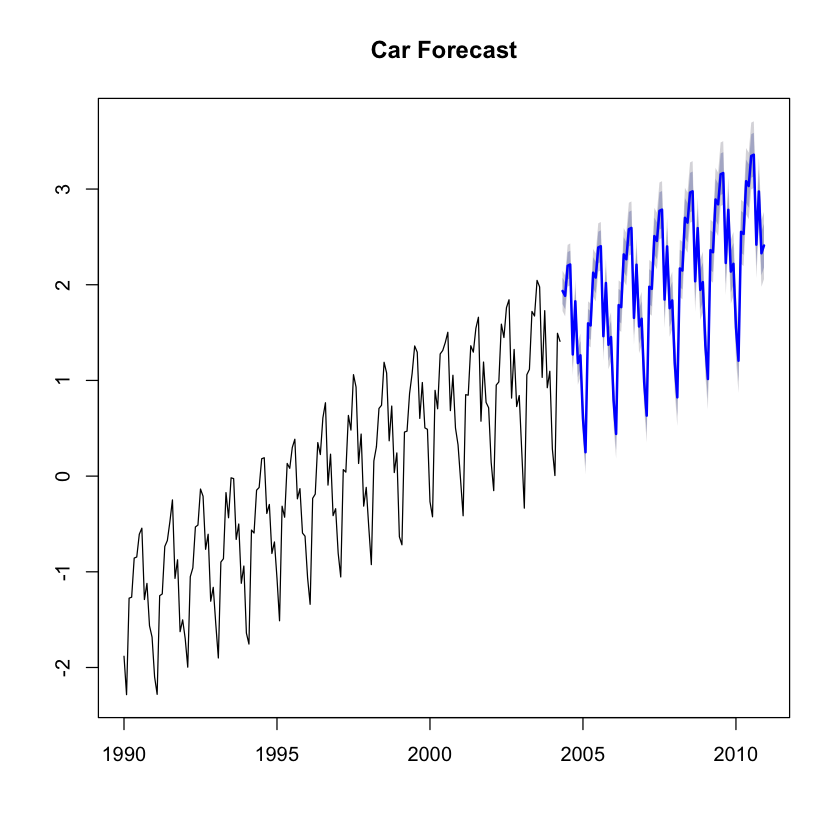

In [16]:
plot(future, main="Car Forecast")

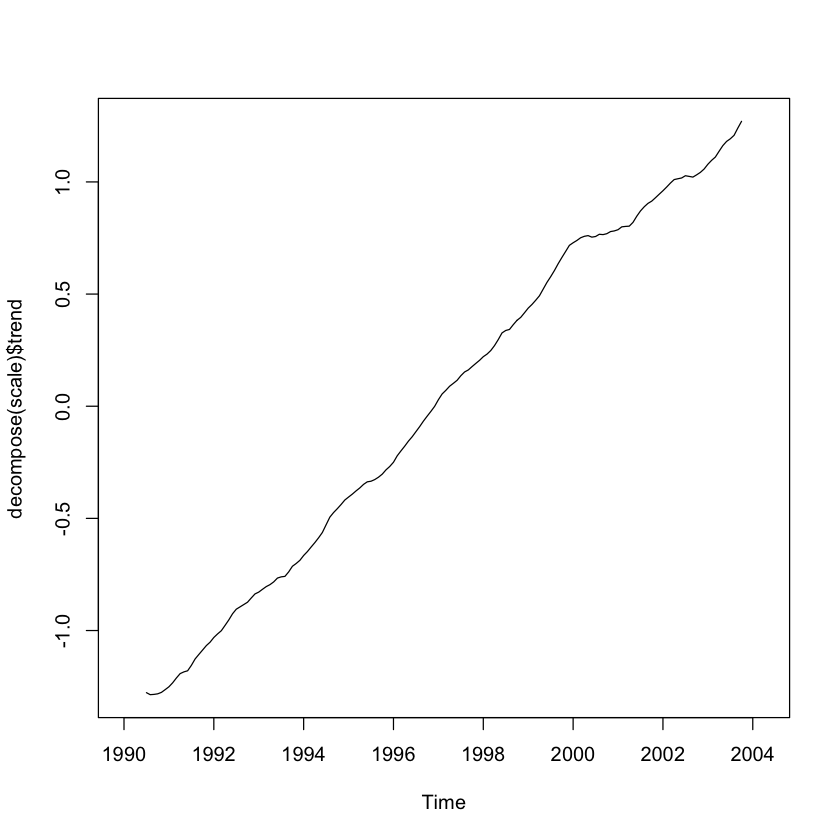

In [18]:
plot(decompose(scale)$trend)